In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
url = 'https://raw.githubusercontent.com/Iva-Cvetkovska/forest-fires-linear-regression/main/forestfires.csv'
df = pd.read_csv(url)
df.describe()
# For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles.
# By default the lower percentile is 25 and the upper percentile is 75.
# The 50 percentile is the same as the median.

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Data Preprocessing**

In [16]:
df['month'] = pd.Categorical(df['month']).codes
df['day'] = pd.Categorical(df['day']).codes

x = df.drop(['area'], axis=1)
y = df['area']
y.dtype

dtype('float64')

**Feature Selection**

In [10]:
K = 5
selector = SelectKBest(score_func=f_classif, k=K)
x_new = selector.fit_transform(x, y)

selected_indexes = selector.get_support(indices=True)
selected_features = x.columns[selected_indexes]
print(f'Selected features: ${selected_features}')

Selected features: $Index(['X', 'month', 'temp', 'wind', 'rain'], dtype='object')


**Feature Extraction**

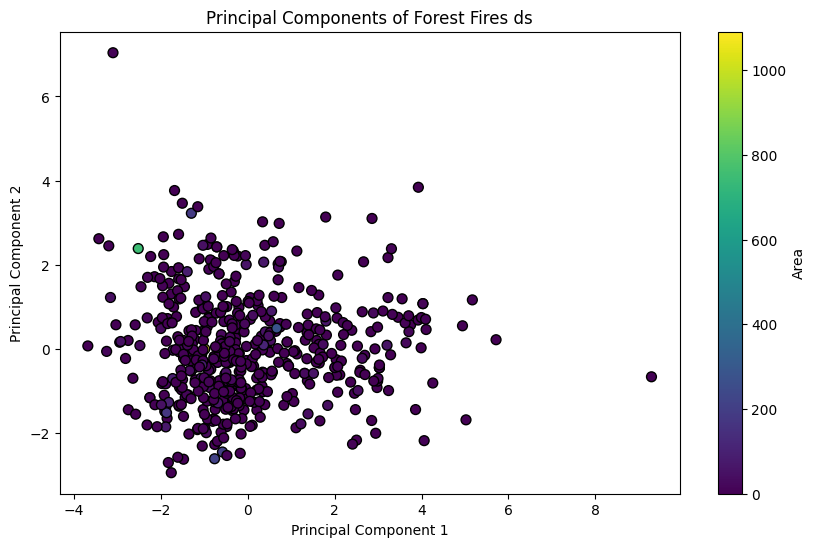

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap="viridis", edgecolor='k', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Components of Forest Fires ds")
plt.colorbar(label='Area')
plt.show()

**Random Forest Classifier**

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 5553.9216297693465
MAE: 23.482074501424503
R2: -0.34030616071862063
